In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 3 (a)

In [58]:
def L(theta):
    return 0.5 * (theta[0]**2 - theta[1])**2 + .5 * (theta[0] - 1)**2

def Lgrad(theta):
    theta1 = 2*theta[0]**3 + theta[0]*(1 - 2*theta[1]) - 1
    theta2 = theta[1] - theta[0]**2
    return np.array([theta1, theta2])

def gradient_descent(grad, guess, eta=1e-3, tol=1e-6):
    """
    grad - gradient function
    w0 - initial guess (nx1 vector)
    eta - step size
    tol - convergence tolerance
    """
    current_tol = 100
    w0_0 = [guess[0]]
    w1_0 = [guess[1]]
    while current_tol > tol:
        w_curr = [w0_0[-1],w1_0[-1]]
        w_new = w_curr - eta * grad(w_curr)
        w0_0.append(w_new[0])
        w1_0.append(w_new[1])
        current_tol = np.sqrt((w_new[0]-w_curr[0])**2 + (w_new[1]-w_curr[1])**2)
    return w0_0, w1_0

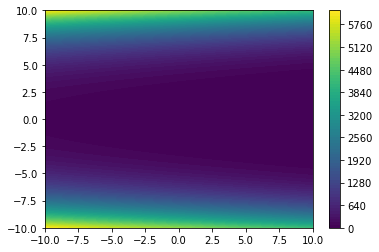

In [59]:
# Perform a parameter sweep of L
iters = 100
theta1_vec = np.linspace(-10, 10, iters)
theta2_vec = np.linspace(-10, 10, iters)
L_array = np.zeros([iters, iters])
for i in range(theta1_vec.size):
    for j in range(theta2_vec.size):
        t = np.array([theta1_vec[i], theta2_vec[j]])
        L_array[i, j] = L(t)
plt.contourf(theta1_vec, theta2_vec, L_array, 100)
plt.colorbar()
plt.show()

Values of theta_1, theta2:  0.9999999999998335 0.9999999999996114


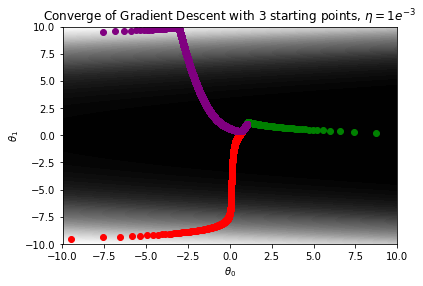

In [65]:
# Apply gradient descent to find the minimum from 3 different starting locations
test1_0, test1_1 = gradient_descent(Lgrad, [-9.5, -9.5], 1e-3, 1e-16)
test2_0, test2_1 = gradient_descent(Lgrad, [8.7124123, 0.2325191])
test3_0, test3_1 = gradient_descent(Lgrad, [-7.5673124, 9.5])

print('Values of theta_1, theta2: ', test1_0[-1], test1_1[-1])

#plot convergences from guesses and contour map
plt.contourf(theta2_vec, theta1_vec, L_array, 100, cmap='Greys_r')
plt.scatter(test1_0,test1_1,c='r')
plt.scatter(test2_0,test2_1,c='g')
plt.scatter(test3_0,test3_1,c='purple')
plt.title(r'Converge of Gradient Descent with 3 starting points, $\eta = 1e^{-3}$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

# Problem 3 (b)

In [51]:
def L_b(theta):
    return -theta[0] + 0.5 * np.sin(2*np.pi*theta[0]) * np.sin(2*np.pi*theta[1])

def Lgrad_b(theta):
    theta1 = np.pi*np.cos(2*np.pi*theta[0])*np.sin(2*np.pi*theta[1]) - 1
    theta2 = np.pi*np.sin(2*np.pi*theta[0])*np.cos(2*np.pi*theta[1])
    return np.array([theta1, theta2])

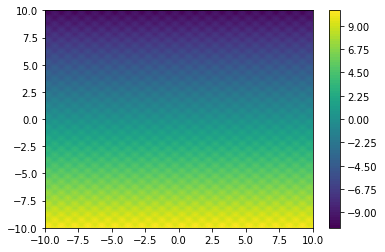

In [52]:
# Perform a parameter sweep of L
iters = 1000
theta1_vec = np.linspace(-10, 10, iters)
theta2_vec = np.linspace(-10, 10, iters)
L_array_b = np.zeros([iters, iters])
for i in range(theta1_vec.size):
    for j in range(theta2_vec.size):
        t = np.array([theta1_vec[i], theta2_vec[j]])
        L_array_b[i, j] = L_b(t)
plt.contourf(theta1_vec, theta2_vec, L_array_b, 100)
plt.colorbar()
plt.show()

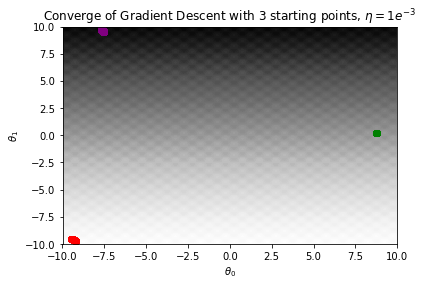

In [53]:
# Apply gradient descent to find the minimum from 3 different starting locations
test1_0, test1_1 = gradient_descent(Lgrad_b, [-9.5, -9.5])
test2_0, test2_1 = gradient_descent(Lgrad_b, [8.7124123, 0.2325191])
test3_0, test3_1 = gradient_descent(Lgrad_b, [-7.5673124, 9.5])

#plot convergences from guesses and contour map
plt.contourf(theta2_vec, theta1_vec, L_array_b, 100, cmap='Greys_r')
plt.scatter(test1_0,test1_1,c='r')
plt.scatter(test2_0,test2_1,c='g')
plt.scatter(test3_0,test3_1,c='purple')
plt.title(r'Converge of Gradient Descent with 3 starting points, $\eta = 1e^{-3}$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
# plt.savefig('figure1.png')
plt.show()

In [71]:
test1_0, test1_1 = gradient_descent(Lgrad_b, [1, .5], 1e-5, 1e-16)
print('Values of theta_1, theta2: ', test1_0[-1], test1_1[-1])

Values of theta_1, theta2:  1.3015576242130074 0.7499999999997035
